We are going to use the [CRIT Prompting Method](https://www.linkedin.com/pulse/context-role-interview-task-crit-framework-unlocking-ais-eric-shreve-0znkc/) which works really well for Guided Analytics.

You want to setup your Fabric Spark Notebook in vscode using the Fabric Data Engineering Extension.  

Roughly, this is what my vscode looks like, with ghcopilot running on the right:  

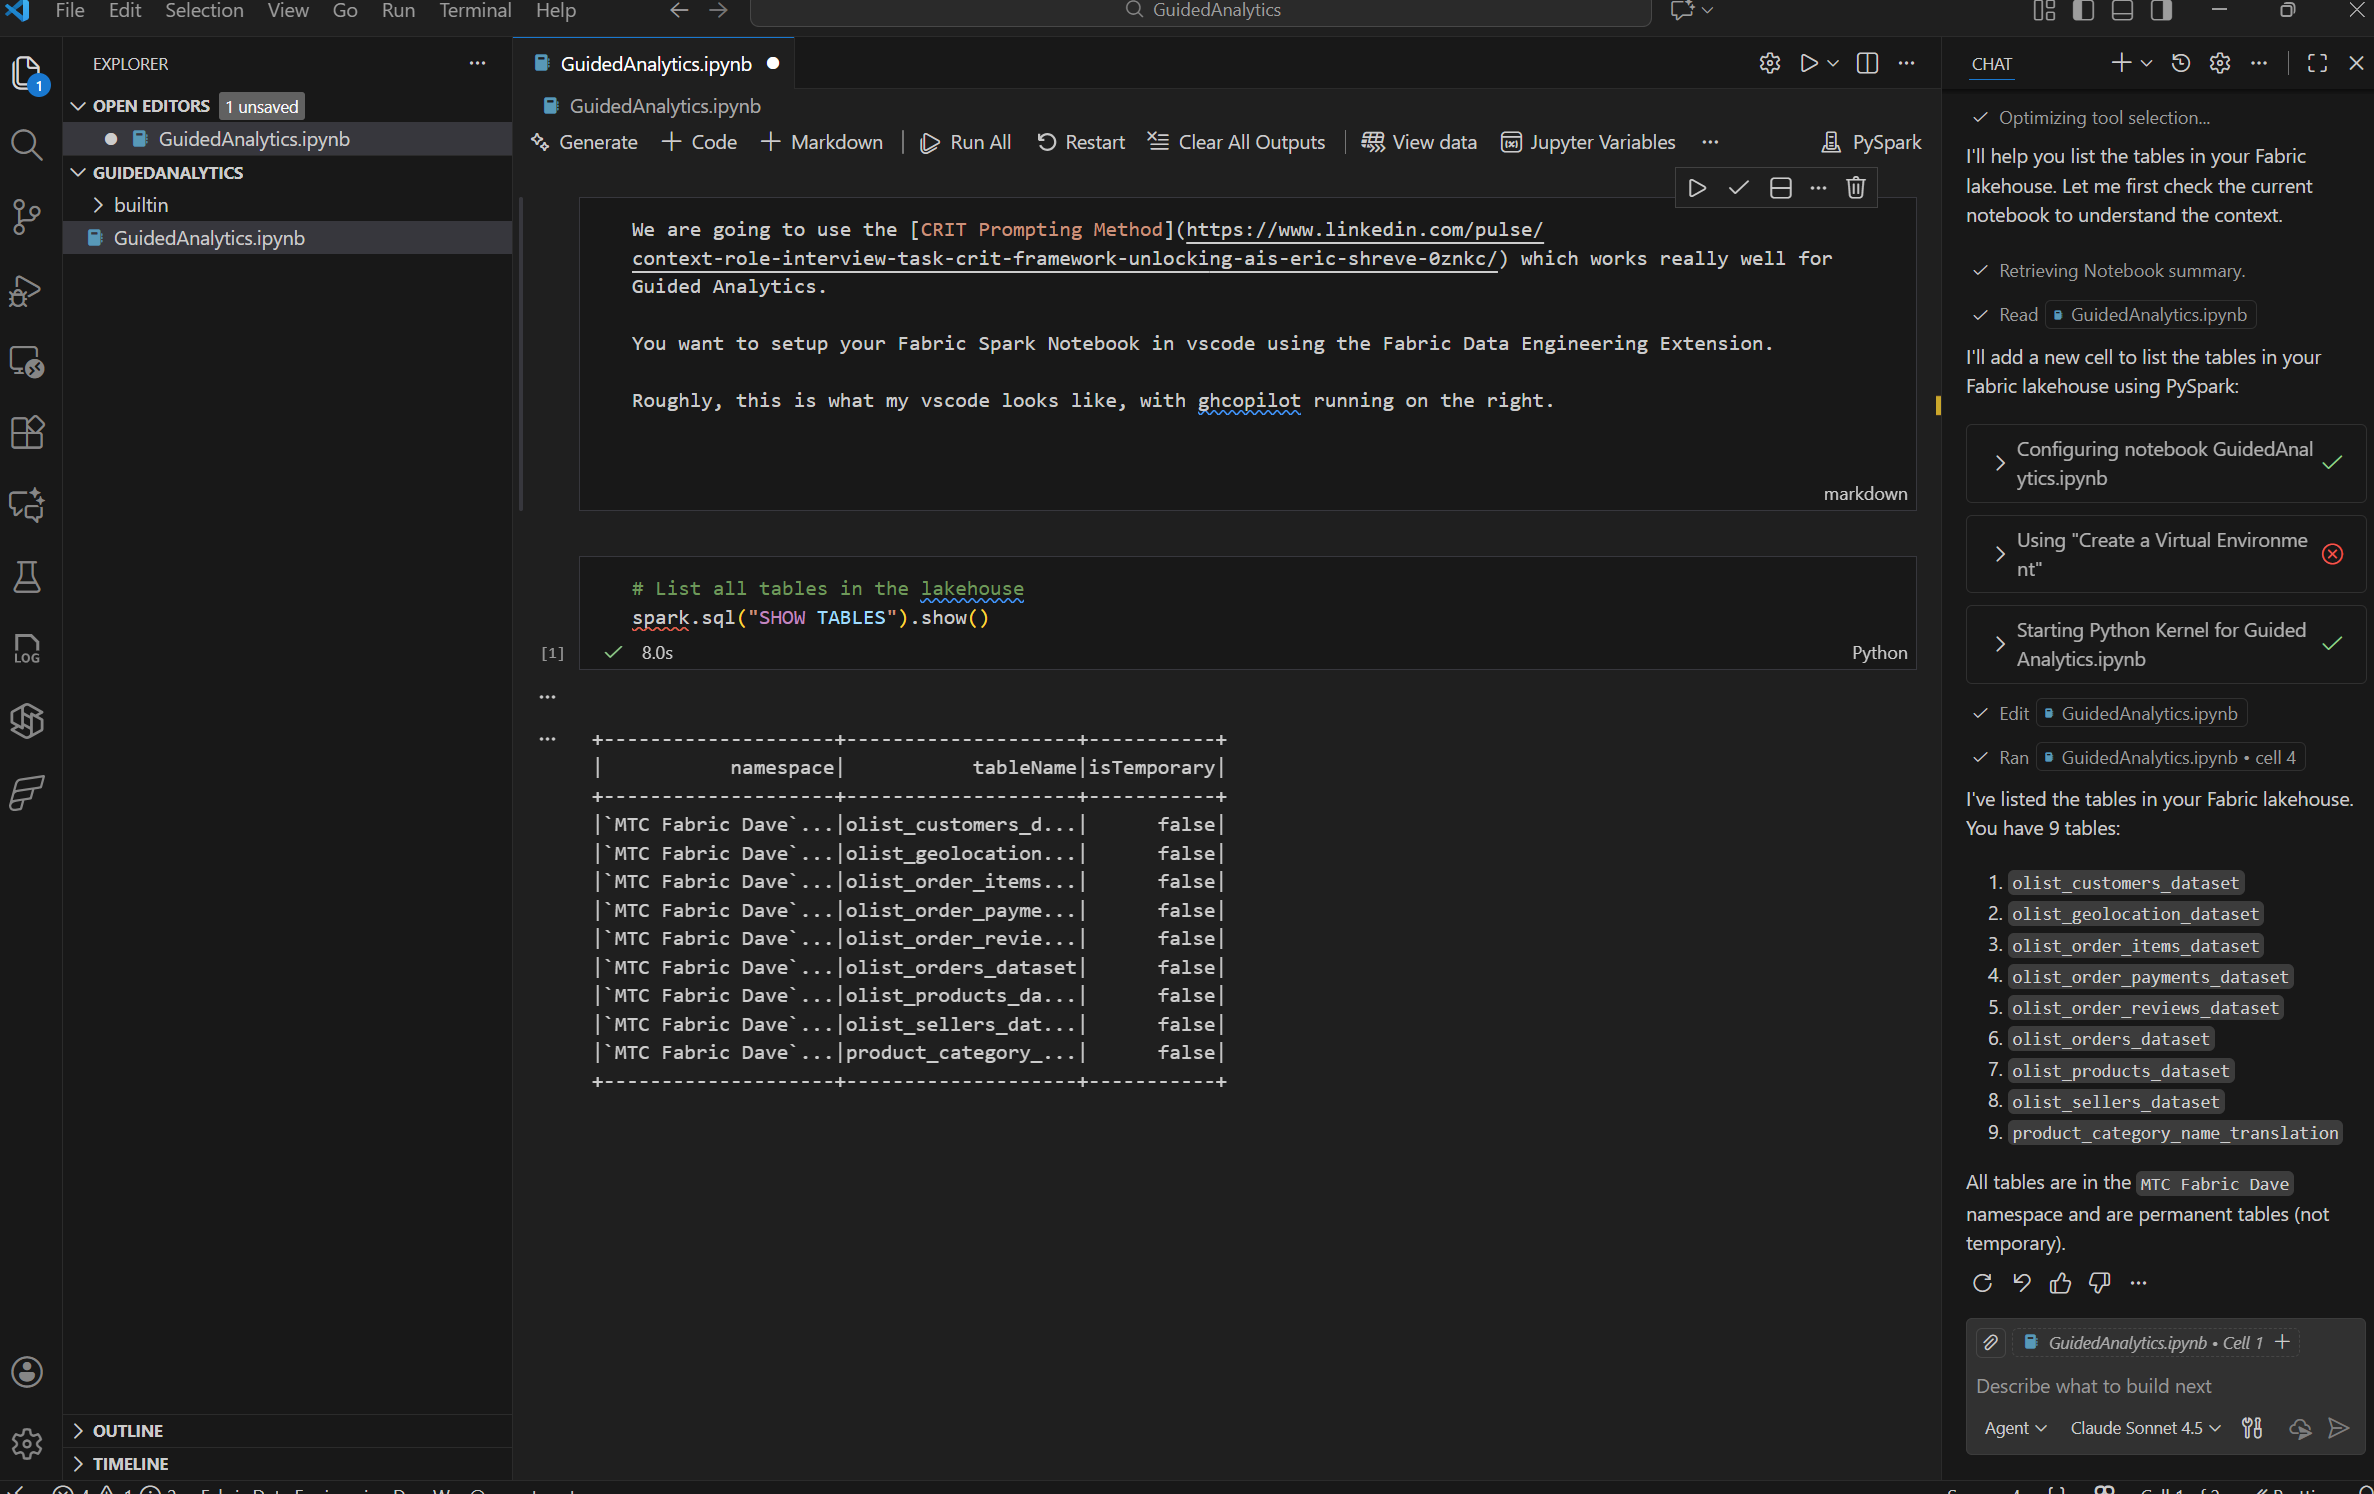

Every time I want you to put a prompt in ghcopilot I'll put the prompt in a code block.  

Let's make sure things are working:

>Prompt:  
>list the tables in my fabric lakehouse

This should generate this code:  

In [1]:
# List all tables in the lakehouse
spark.sql("SHOW TABLES").show()

StatementMeta(, 62a6b697-90b1-4411-bd2d-571e0e9a8460, 8, Finished, Available, Finished)

+--------------------+--------------------+-----------+
|           namespace|           tableName|isTemporary|
+--------------------+--------------------+-----------+
|`MTC Fabric Dave`...|olist_customers_d...|      false|
|`MTC Fabric Dave`...|olist_geolocation...|      false|
|`MTC Fabric Dave`...|olist_order_items...|      false|
|`MTC Fabric Dave`...|olist_order_payme...|      false|
|`MTC Fabric Dave`...|olist_order_revie...|      false|
|`MTC Fabric Dave`...|olist_orders_dataset|      false|
|`MTC Fabric Dave`...|olist_products_da...|      false|
|`MTC Fabric Dave`...|olist_sellers_dat...|      false|
|`MTC Fabric Dave`...|product_category_...|      false|
+--------------------+--------------------+-----------+



Now let's start:

Prompt:

>Context:  
Look at my lakehouse.  You'll note I have 9 tables.  The data comes from a South American e-commerce company and the orders span approx 2016 to 2018.  You should assume the data is accurate but it's a good idea to verify any assumptions by actually querying the data.  

>Role:
You are a business analyst with 10 years of experience helping retailers and e-commerce companies improve their business processes.  You are starting a new consulting gig and you were given the above context about the data you want to use to help this company improve their business.  You have no additional information about this company.  

>Interview:

>I am the CEO of this company.  I want YOU to give me a list of FIVE potential research questions that you believe would be answerable given the datasets above.  After you give those to me I will pick a few with you and ask you to dive deeper.  

>Go!

_Note: we skipped the "Tasks:" section.  We'll do that after the LLM gives us the questions._

Here is the output from Claude:

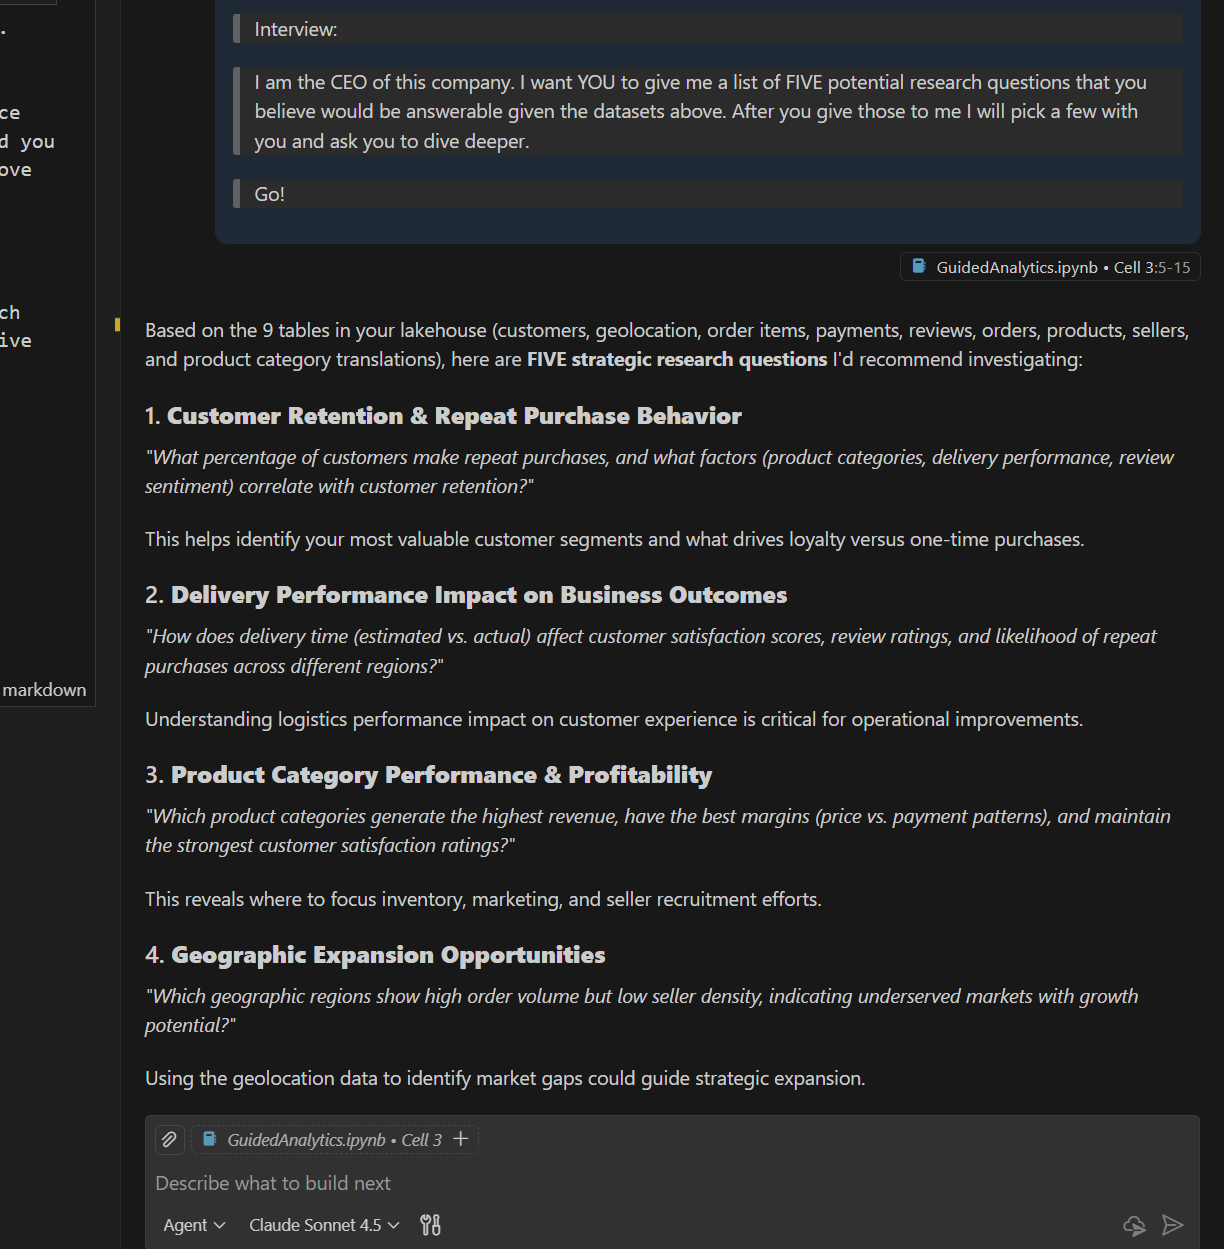

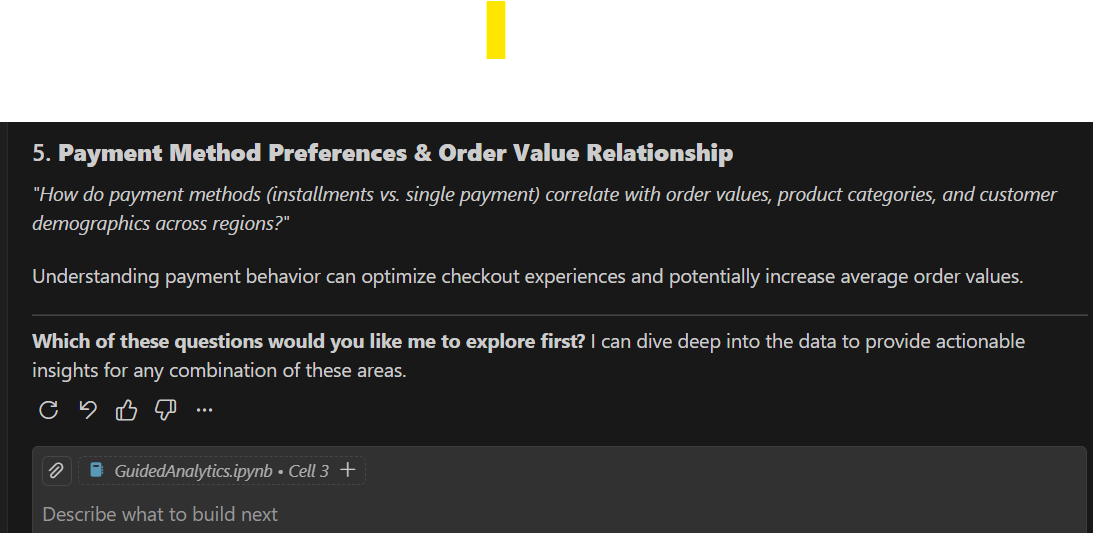

That's pretty slick.  

Let's continue

>Task:  
>OK.  Let's look at this question:"What are the most popular product categories in terms of revenue, and how do their sales performance vary across different regions".  Can you give me a design of the analysis that would answer this question given the information provided?  Don't make assumptions about the data, what steps would you take to analyze the data at each step of the process?  Keep the process high level, I'll ask follow-on questions.  

## The output is REALLY cool:  This is exactly how a data scientist would think through the problem

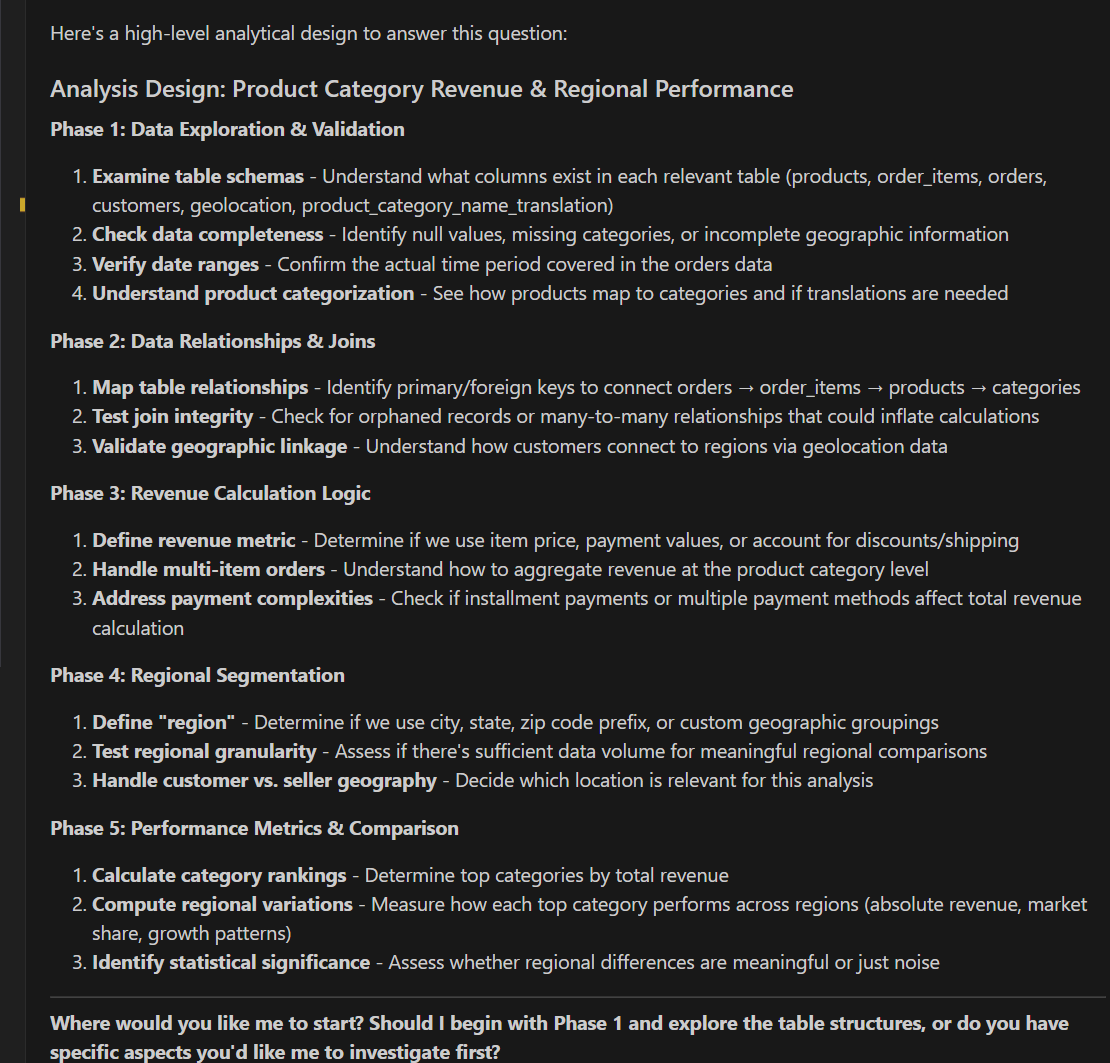

> Yes, let's look at the table structures. 

Since I'm in Agent Mode it automatically wrote the following code blocks:


## Phase 1: Examine Table Structures

Let's look at the schema of each relevant table to understand what data we have available:

In [ ]:
# Products table - contains product information and category mapping
print("=== PRODUCTS TABLE ===")
spark.sql("DESCRIBE olist_products_dataset").show(100, False)

StatementMeta(, ef54e93c-ed03-476e-bc52-665d868231c3, 7, Finished, Available, Finished)

=== PRODUCTS TABLE ===
+--------------------------+---------+-------+
|col_name                  |data_type|comment|
+--------------------------+---------+-------+
|product_id                |string   |NULL   |
|product_category_name     |string   |NULL   |
|product_name_lenght       |string   |NULL   |
|product_description_lenght|string   |NULL   |
|product_photos_qty        |string   |NULL   |
|product_weight_g          |string   |NULL   |
|product_length_cm         |string   |NULL   |
|product_height_cm         |string   |NULL   |
|product_width_cm          |string   |NULL   |
+--------------------------+---------+-------+

+--------------------------+---------+-------+
|col_name                  |data_type|comment|
+--------------------------+---------+-------+
|product_id                |string   |NULL   |
|product_category_name     |string   |NULL   |
|product_name_lenght       |string   |NULL   |
|product_description_lenght|string   |NULL   |
|product_photos_qty        |string  

In [ ]:
# Order Items table - contains pricing and product details per order
print("=== ORDER ITEMS TABLE ===")
spark.sql("DESCRIBE olist_order_items_dataset").show(100, False)

StatementMeta(, ef54e93c-ed03-476e-bc52-665d868231c3, 3, Finished, Available, Finished)

=== ORDER ITEMS TABLE ===
+-------------------+---------+-------+
|col_name           |data_type|comment|
+-------------------+---------+-------+
|order_id           |string   |NULL   |
|order_item_id      |string   |NULL   |
|product_id         |string   |NULL   |
|seller_id          |string   |NULL   |
|shipping_limit_date|string   |NULL   |
|price              |string   |NULL   |
|freight_value      |string   |NULL   |
+-------------------+---------+-------+

+-------------------+---------+-------+
|col_name           |data_type|comment|
+-------------------+---------+-------+
|order_id           |string   |NULL   |
|order_item_id      |string   |NULL   |
|product_id         |string   |NULL   |
|seller_id          |string   |NULL   |
|shipping_limit_date|string   |NULL   |
|price              |string   |NULL   |
|freight_value      |string   |NULL   |
+-------------------+---------+-------+



In [4]:
# Orders table - contains order status and timestamps
print("=== ORDERS TABLE ===")
spark.sql("DESCRIBE olist_orders_dataset").show(100, False)

StatementMeta(, ef54e93c-ed03-476e-bc52-665d868231c3, 4, Finished, Available, Finished)

=== ORDERS TABLE ===
+-----------------------------+---------+-------+
|col_name                     |data_type|comment|
+-----------------------------+---------+-------+
|order_id                     |string   |NULL   |
|customer_id                  |string   |NULL   |
|order_status                 |string   |NULL   |
|order_purchase_timestamp     |string   |NULL   |
|order_approved_at            |string   |NULL   |
|order_delivered_carrier_date |string   |NULL   |
|order_delivered_customer_date|string   |NULL   |
|order_estimated_delivery_date|string   |NULL   |
+-----------------------------+---------+-------+

+-----------------------------+---------+-------+
|col_name                     |data_type|comment|
+-----------------------------+---------+-------+
|order_id                     |string   |NULL   |
|customer_id                  |string   |NULL   |
|order_status                 |string   |NULL   |
|order_purchase_timestamp     |string   |NULL   |
|order_approved_at          

In [ ]:
# Customers table - contains customer geographic information
print("=== CUSTOMERS TABLE ===")
spark.sql("DESCRIBE olist_customers_dataset").show(100, False)

StatementMeta(, ef54e93c-ed03-476e-bc52-665d868231c3, 5, Finished, Available, Finished)

=== CUSTOMERS TABLE ===
+------------------------+---------+-------+
|col_name                |data_type|comment|
+------------------------+---------+-------+
|customer_id             |string   |NULL   |
|customer_unique_id      |string   |NULL   |
|customer_zip_code_prefix|string   |NULL   |
|customer_city           |string   |NULL   |
|customer_state          |string   |NULL   |
+------------------------+---------+-------+

+------------------------+---------+-------+
|col_name                |data_type|comment|
+------------------------+---------+-------+
|customer_id             |string   |NULL   |
|customer_unique_id      |string   |NULL   |
|customer_zip_code_prefix|string   |NULL   |
|customer_city           |string   |NULL   |
|customer_state          |string   |NULL   |
+------------------------+---------+-------+



In [ ]:
# Product Category Name Translation - maps Portuguese category names to English
print("=== PRODUCT CATEGORY TRANSLATION TABLE ===")
spark.sql("DESCRIBE product_category_name_translation").show(100, False)

StatementMeta(, ef54e93c-ed03-476e-bc52-665d868231c3, 6, Finished, Available, Finished)

=== PRODUCT CATEGORY TRANSLATION TABLE ===
+-----------------------------+---------+-------+
|col_name                     |data_type|comment|
+-----------------------------+---------+-------+
|product_category_name        |string   |NULL   |
|product_category_name_english|string   |NULL   |
+-----------------------------+---------+-------+

+-----------------------------+---------+-------+
|col_name                     |data_type|comment|
+-----------------------------+---------+-------+
|product_category_name        |string   |NULL   |
|product_category_name_english|string   |NULL   |
+-----------------------------+---------+-------+



### Key Observations from Table Structures:

**For Revenue Analysis:**
- `olist_order_items_dataset` contains **price** and **freight_value** columns - this is our revenue source
- Revenue can be calculated as: `price + freight_value` (or just `price` if we exclude shipping)

**For Product Categories:**
- `olist_products_dataset` has **product_category_name** (in Portuguese)
- `product_category_name_translation` maps Portuguese → English category names
- Join path: order_items → products → category_translation

**For Regional Analysis:**
- `olist_customers_dataset` has geographic data: **customer_city** and **customer_state**
- We can use **state** for regional segmentation (appears to be the most reliable granularity)
- Join path: order_items → orders → customers

**Data Relationships:**
- `order_items.order_id` → `orders.order_id`
- `order_items.product_id` → `products.product_id`
- `orders.customer_id` → `customers.customer_id`
- `products.product_category_name` → `translation.product_category_name`

**Note:** All columns are stored as STRING type - we'll need to cast numeric fields appropriately.

## In the Chat pane it also added this:

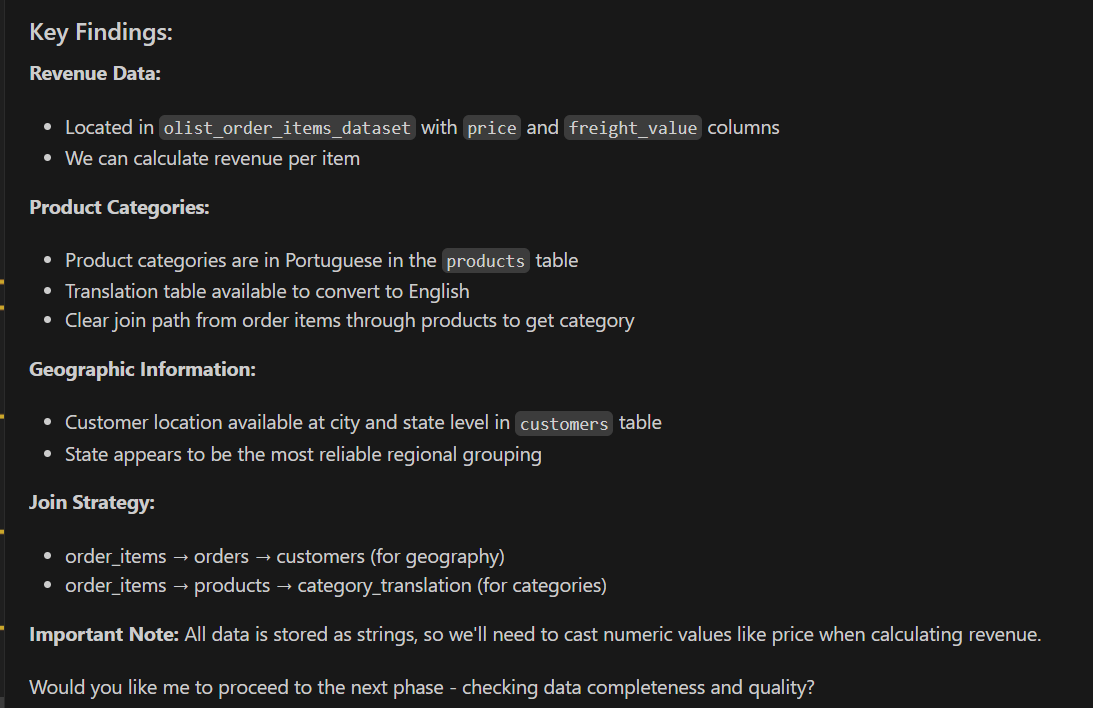

## I answered YES to the prompt

## Phase 2: Data Completeness & Quality Checks

Let's verify data quality and identify any potential issues:

In [8]:
# Check for NULL values in key columns
print("=== NULL VALUE ANALYSIS ===\n")

# Products - check category completeness
products_nulls = spark.sql("""
    SELECT 
        COUNT(*) as total_products,
        SUM(CASE WHEN product_category_name IS NULL THEN 1 ELSE 0 END) as null_categories,
        ROUND(SUM(CASE WHEN product_category_name IS NULL THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) as pct_null_categories
    FROM olist_products_dataset
""")
print("PRODUCTS TABLE:")
products_nulls.show()

# Order Items - check price and product_id completeness
order_items_nulls = spark.sql("""
    SELECT 
        COUNT(*) as total_order_items,
        SUM(CASE WHEN price IS NULL THEN 1 ELSE 0 END) as null_price,
        SUM(CASE WHEN product_id IS NULL THEN 1 ELSE 0 END) as null_product_id,
        ROUND(SUM(CASE WHEN price IS NULL THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) as pct_null_price
    FROM olist_order_items_dataset
""")
print("ORDER ITEMS TABLE:")
order_items_nulls.show()

# Orders - check customer_id completeness
orders_nulls = spark.sql("""
    SELECT 
        COUNT(*) as total_orders,
        SUM(CASE WHEN customer_id IS NULL THEN 1 ELSE 0 END) as null_customer_id,
        ROUND(SUM(CASE WHEN customer_id IS NULL THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) as pct_null_customer
    FROM olist_orders_dataset
""")
print("ORDERS TABLE:")
orders_nulls.show()

# Customers - check state/city completeness
customers_nulls = spark.sql("""
    SELECT 
        COUNT(*) as total_customers,
        SUM(CASE WHEN customer_state IS NULL THEN 1 ELSE 0 END) as null_state,
        SUM(CASE WHEN customer_city IS NULL THEN 1 ELSE 0 END) as null_city,
        ROUND(SUM(CASE WHEN customer_state IS NULL THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) as pct_null_state
    FROM olist_customers_dataset
""")
print("CUSTOMERS TABLE:")
customers_nulls.show()

StatementMeta(, ef54e93c-ed03-476e-bc52-665d868231c3, 8, Finished, Available, Finished)

=== NULL VALUE ANALYSIS ===

PRODUCTS TABLE:
PRODUCTS TABLE:
+--------------+---------------+-------------------+
|total_products|null_categories|pct_null_categories|
+--------------+---------------+-------------------+
|         32951|            610|               1.85|
+--------------+---------------+-------------------+

ORDER ITEMS TABLE:
+--------------+---------------+-------------------+
|total_products|null_categories|pct_null_categories|
+--------------+---------------+-------------------+
|         32951|            610|               1.85|
+--------------+---------------+-------------------+

ORDER ITEMS TABLE:
+-----------------+----------+---------------+--------------+
|total_order_items|null_price|null_product_id|pct_null_price|
+-----------------+----------+---------------+--------------+
|           112650|         0|              0|          0.00|
+-----------------+----------+---------------+--------------+

ORDERS TABLE:
+-----------------+----------+--------------

In [9]:
# Verify date range of orders
print("=== ORDER DATE RANGE ===")
date_range = spark.sql("""
    SELECT 
        MIN(order_purchase_timestamp) as earliest_order,
        MAX(order_purchase_timestamp) as latest_order,
        COUNT(DISTINCT DATE(order_purchase_timestamp)) as unique_order_dates
    FROM olist_orders_dataset
    WHERE order_purchase_timestamp IS NOT NULL
""")
date_range.show(truncate=False)

StatementMeta(, ef54e93c-ed03-476e-bc52-665d868231c3, 9, Finished, Available, Finished)

=== ORDER DATE RANGE ===
+-------------------+-------------------+------------------+
|earliest_order     |latest_order       |unique_order_dates|
+-------------------+-------------------+------------------+
|2016-09-04 21:15:19|2018-10-17 17:30:18|634               |
+-------------------+-------------------+------------------+

+-------------------+-------------------+------------------+
|earliest_order     |latest_order       |unique_order_dates|
+-------------------+-------------------+------------------+
|2016-09-04 21:15:19|2018-10-17 17:30:18|634               |
+-------------------+-------------------+------------------+



In [10]:
# Check how many product categories exist and translation coverage
print("=== PRODUCT CATEGORY COVERAGE ===")
category_coverage = spark.sql("""
    SELECT 
        COUNT(DISTINCT p.product_category_name) as total_categories_in_products,
        COUNT(DISTINCT t.product_category_name) as categories_with_translation,
        COUNT(DISTINCT p.product_category_name) - COUNT(DISTINCT t.product_category_name) as untranslated_categories
    FROM olist_products_dataset p
    LEFT JOIN product_category_name_translation t 
        ON p.product_category_name = t.product_category_name
    WHERE p.product_category_name IS NOT NULL
""")
category_coverage.show(truncate=False)

StatementMeta(, ef54e93c-ed03-476e-bc52-665d868231c3, 10, Finished, Available, Finished)

=== PRODUCT CATEGORY COVERAGE ===
+----------------------------+---------------------------+-----------------------+
|total_categories_in_products|categories_with_translation|untranslated_categories|
+----------------------------+---------------------------+-----------------------+
|73                          |71                         |2                      |
+----------------------------+---------------------------+-----------------------+

+----------------------------+---------------------------+-----------------------+
|total_categories_in_products|categories_with_translation|untranslated_categories|
+----------------------------+---------------------------+-----------------------+
|73                          |71                         |2                      |
+----------------------------+---------------------------+-----------------------+



In [11]:
# Check regional distribution - how many states/cities
print("=== GEOGRAPHIC DISTRIBUTION ===")
geo_distribution = spark.sql("""
    SELECT 
        COUNT(DISTINCT customer_state) as unique_states,
        COUNT(DISTINCT customer_city) as unique_cities,
        COUNT(*) as total_customer_records
    FROM olist_customers_dataset
""")
geo_distribution.show()

StatementMeta(, ef54e93c-ed03-476e-bc52-665d868231c3, 11, Finished, Available, Finished)

=== GEOGRAPHIC DISTRIBUTION ===
+-------------+-------------+----------------------+
|unique_states|unique_cities|total_customer_records|
+-------------+-------------+----------------------+
|           27|         4119|                 99441|
+-------------+-------------+----------------------+

+-------------+-------------+----------------------+
|unique_states|unique_cities|total_customer_records|
+-------------+-------------+----------------------+
|           27|         4119|                 99441|
+-------------+-------------+----------------------+



In [12]:
# Test join integrity - check for orphaned records
print("=== JOIN INTEGRITY CHECKS ===\n")

# Orders without customers
orphaned_orders = spark.sql("""
    SELECT COUNT(*) as orders_without_customers
    FROM olist_orders_dataset o
    LEFT JOIN olist_customers_dataset c ON o.customer_id = c.customer_id
    WHERE c.customer_id IS NULL
""")
print("Orders without matching customers:")
orphaned_orders.show()

# Order items without products
orphaned_items = spark.sql("""
    SELECT COUNT(*) as order_items_without_products
    FROM olist_order_items_dataset oi
    LEFT JOIN olist_products_dataset p ON oi.product_id = p.product_id
    WHERE p.product_id IS NULL
""")
print("Order items without matching products:")
orphaned_items.show()

# Order items without orders
orphaned_items_orders = spark.sql("""
    SELECT COUNT(*) as order_items_without_orders
    FROM olist_order_items_dataset oi
    LEFT JOIN olist_orders_dataset o ON oi.order_id = o.order_id
    WHERE o.order_id IS NULL
""")
print("Order items without matching orders:")
orphaned_items_orders.show()

StatementMeta(, ef54e93c-ed03-476e-bc52-665d868231c3, 12, Finished, Available, Finished)

=== JOIN INTEGRITY CHECKS ===

Orders without matching customers:
Orders without matching customers:
+------------------------+
|orders_without_customers|
+------------------------+
|                       0|
+------------------------+

+------------------------+
|orders_without_customers|
+------------------------+
|                       0|
+------------------------+

Order items without matching products:
Order items without matching products:
+----------------------------+
|order_items_without_products|
+----------------------------+
|                           0|
+----------------------------+

Order items without matching orders:
+----------------------------+
|order_items_without_products|
+----------------------------+
|                           0|
+----------------------------+

Order items without matching orders:
+--------------------------+
|order_items_without_orders|
+--------------------------+
|                         0|
+--------------------------+

+----------------

### Data Quality Summary:

**✅ Good News:**
- **No orphaned records** - All joins are clean (orders→customers, order_items→orders, order_items→products)
- **Complete pricing data** - 0% NULL values in price field
- **Complete geographic data** - All customers have state and city information
- **Date range confirmed** - Orders span from Sept 2016 to Oct 2018 (634 unique order dates)
- **Geographic coverage** - 27 states and 4,119 cities represented

**⚠️ Issues to Address:**
1. **Product categories**: 610 products (1.85%) have NULL category names - need to decide how to handle these
2. **Translation gaps**: 2 categories lack English translations (out of 73 total categories)

**Recommendations for Analysis:**
- **Exclude NULL categories** when calculating revenue by category (affects <2% of products)
- **Use state-level geography** for regional analysis (27 states is manageable; 4,119 cities may be too granular)
- **Filter for valid product categories** to ensure clean category-level revenue calculations
- **Handle untranslated categories** - either exclude them or keep Portuguese names for those 2 categories

## It also added this in the chat window:
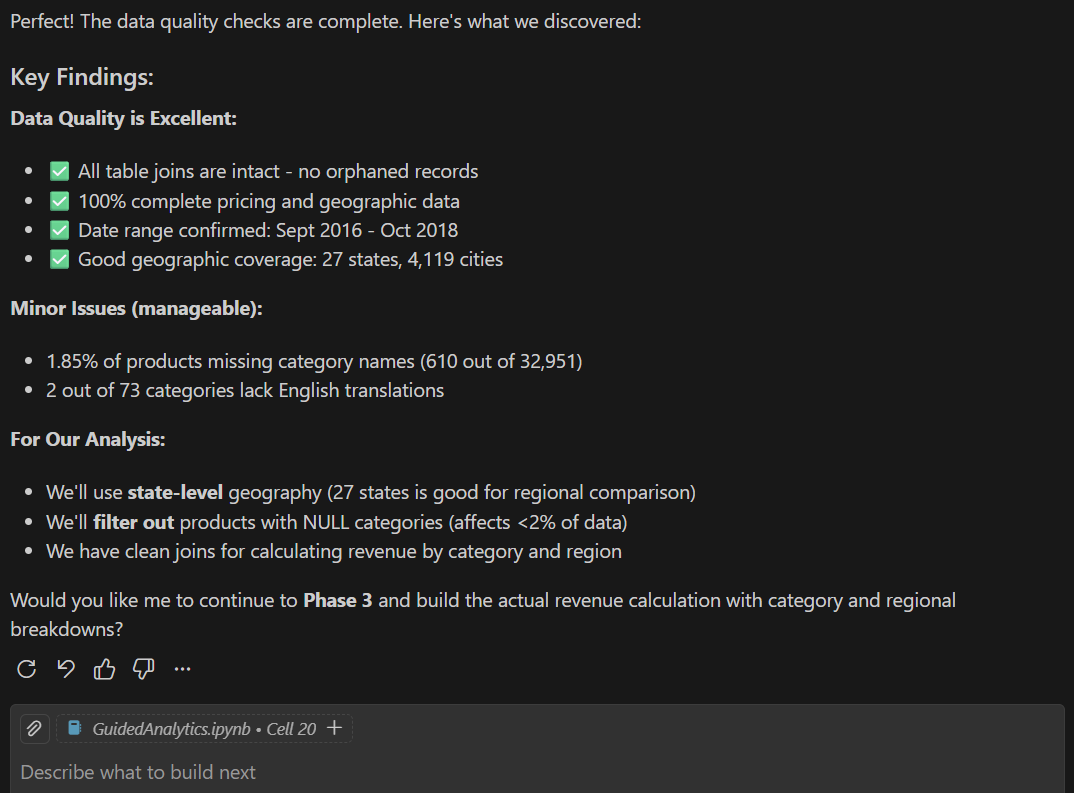

> Prompt:  
> Yes, continue to Phase 3.


## Phase 3: Build Revenue Calculation Query

Now let's create the main query to calculate revenue by product category and region:

In [ ]:
# Create the base revenue dataset with all necessary joins
revenue_by_category_region = spark.sql("""
    SELECT 
        COALESCE(t.product_category_name_english, p.product_category_name) as category,
        c.customer_state as state,
        oi.order_id,
        oi.order_item_id,
        CAST(oi.price AS DECIMAL(10,2)) as item_price,
        CAST(oi.freight_value AS DECIMAL(10,2)) as freight,
        CAST(oi.price AS DECIMAL(10,2)) + CAST(oi.freight_value AS DECIMAL(10,2)) as total_revenue
    FROM olist_order_items_dataset oi
    INNER JOIN olist_orders_dataset o 
        ON oi.order_id = o.order_id
    INNER JOIN olist_customers_dataset c 
        ON o.customer_id = c.customer_id
    INNER JOIN olist_products_dataset p 
        ON oi.product_id = p.product_id
    LEFT JOIN product_category_name_translation t 
        ON p.product_category_name = t.product_category_name
    WHERE p.product_category_name IS NOT NULL
        AND o.order_status = 'delivered'
""")

# Register as temp view for easier querying
revenue_by_category_region.createOrReplaceTempView("revenue_data")

print("Revenue data prepared successfully!")
print(f"Total records: {revenue_by_category_region.count():,}")
revenue_by_category_region.show(10)

StatementMeta(, ef54e93c-ed03-476e-bc52-665d868231c3, 13, Finished, Available, Finished)

Revenue data prepared successfully!
Total records: 108,660
Total records: 108,660
+-------------+-----+--------------------+-------------+----------+-------+-------------+
|     category|state|            order_id|order_item_id|item_price|freight|total_revenue|
+-------------+-----+--------------------+-------------+----------+-------+-------------+
|health_beauty|   SP|8272b63d03f5f79c5...|            8|      1.20|   7.89|         9.09|
|health_beauty|   SP|8272b63d03f5f79c5...|            9|      1.20|   7.89|         9.09|
|health_beauty|   SP|8272b63d03f5f79c5...|           10|      1.20|   7.89|         9.09|
|health_beauty|   SP|8272b63d03f5f79c5...|           11|      1.20|   7.89|         9.09|
|health_beauty|   SP|8272b63d03f5f79c5...|           12|      1.20|   7.89|         9.09|
|health_beauty|   SP|8272b63d03f5f79c5...|           13|      1.20|   7.89|         9.09|
|health_beauty|   SP|8272b63d03f5f79c5...|           14|      1.20|   7.89|         9.09|
|health_beauty|   

In [14]:
# Calculate top product categories by total revenue
print("=== TOP 10 PRODUCT CATEGORIES BY REVENUE ===\n")

top_categories = spark.sql("""
    SELECT 
        category,
        COUNT(DISTINCT order_id) as total_orders,
        COUNT(*) as total_items_sold,
        ROUND(SUM(item_price), 2) as total_item_revenue,
        ROUND(SUM(freight), 2) as total_freight_revenue,
        ROUND(SUM(total_revenue), 2) as total_revenue,
        ROUND(AVG(total_revenue), 2) as avg_revenue_per_item
    FROM revenue_data
    GROUP BY category
    ORDER BY total_revenue DESC
    LIMIT 10
""")

top_categories.show(10, truncate=False)

StatementMeta(, ef54e93c-ed03-476e-bc52-665d868231c3, 14, Finished, Available, Finished)

=== TOP 10 PRODUCT CATEGORIES BY REVENUE ===

+---------------------+------------+----------------+------------------+---------------------+-------------+--------------------+
|category             |total_orders|total_items_sold|total_item_revenue|total_freight_revenue|total_revenue|avg_revenue_per_item|
+---------------------+------------+----------------+------------------+---------------------+-------------+--------------------+
|health_beauty        |8647        |9465            |1233131.72        |178957.81            |1412089.53   |149.19              |
|watches_gifts        |5495        |5859            |1166176.98        |98156.14             |1264333.12   |215.79              |
|bed_bath_table       |9272        |10953           |1023434.76        |201774.50            |1225209.26   |111.86              |
|sports_leisure       |7530        |8431            |954852.55         |163404.36            |1118256.91   |132.64              |
|computers_accessories|6530        |7644    

In [15]:
# Analyze regional distribution of revenue
print("=== REVENUE BY STATE (TOP 10) ===\n")

revenue_by_state = spark.sql("""
    SELECT 
        state,
        COUNT(DISTINCT order_id) as total_orders,
        ROUND(SUM(total_revenue), 2) as total_revenue,
        ROUND(AVG(total_revenue), 2) as avg_revenue_per_item,
        COUNT(DISTINCT category) as unique_categories
    FROM revenue_data
    GROUP BY state
    ORDER BY total_revenue DESC
    LIMIT 10
""")

revenue_by_state.show(10, truncate=False)

StatementMeta(, ef54e93c-ed03-476e-bc52-665d868231c3, 15, Finished, Available, Finished)

=== REVENUE BY STATE (TOP 10) ===

+-----+------------+-------------+--------------------+-----------------+
|state|total_orders|total_revenue|avg_revenue_per_item|unique_categories|
+-----+------------+-------------+--------------------+-----------------+
|SP   |39963       |5698549.55   |124.36              |72               |
|RJ   |12168       |2028970.26   |145.64              |70               |
|MG   |11190       |1797743.07   |141.14              |70               |
|RS   |5270        |851536.14    |140.98              |67               |
|PR   |4855        |772074.76    |138.56              |64               |
|SC   |3491        |587090.24    |145.43              |64               |
|BA   |3215        |583637.01    |161.00              |62               |
|DF   |2050        |343004.77    |147.66              |60               |
|GO   |1911        |324676.46    |145.92              |62               |
|ES   |1978        |315753.20    |143.07              |58               |
+--

In [16]:
# Create category-region performance matrix for top 5 categories and top 10 states
print("=== CATEGORY PERFORMANCE BY STATE (Top 5 Categories × Top 10 States) ===\n")

category_state_matrix = spark.sql("""
    WITH top_5_categories AS (
        SELECT category
        FROM revenue_data
        GROUP BY category
        ORDER BY SUM(total_revenue) DESC
        LIMIT 5
    ),
    top_10_states AS (
        SELECT state
        FROM revenue_data
        GROUP BY state
        ORDER BY SUM(total_revenue) DESC
        LIMIT 10
    )
    SELECT 
        r.category,
        r.state,
        COUNT(DISTINCT r.order_id) as orders,
        COUNT(*) as items_sold,
        ROUND(SUM(r.total_revenue), 2) as revenue,
        ROUND(AVG(r.total_revenue), 2) as avg_item_revenue
    FROM revenue_data r
    INNER JOIN top_5_categories tc ON r.category = tc.category
    INNER JOIN top_10_states ts ON r.state = ts.state
    GROUP BY r.category, r.state
    ORDER BY r.category, revenue DESC
""")

category_state_matrix.show(50, truncate=False)

StatementMeta(, ef54e93c-ed03-476e-bc52-665d868231c3, 16, Finished, Available, Finished)

=== CATEGORY PERFORMANCE BY STATE (Top 5 Categories × Top 10 States) ===

+---------------------+-----+------+----------+---------+----------------+
|category             |state|orders|items_sold|revenue  |avg_item_revenue|
+---------------------+-----+------+----------+---------+----------------+
|bed_bath_table       |SP   |4347  |5157      |549061.89|106.47          |
|bed_bath_table       |RJ   |1357  |1605      |175647.96|109.44          |
|bed_bath_table       |MG   |1120  |1322      |156483.10|118.37          |
|bed_bath_table       |RS   |537   |611       |72428.18 |118.54          |
|bed_bath_table       |PR   |398   |463       |54851.87 |118.47          |
|bed_bath_table       |SC   |268   |326       |37362.68 |114.61          |
|bed_bath_table       |BA   |215   |254       |31245.40 |123.01          |
|bed_bath_table       |GO   |189   |231       |27089.39 |117.27          |
|bed_bath_table       |ES   |197   |223       |26949.26 |120.85          |
|bed_bath_table       |DF 

### Phase 3 Analysis Summary

**Top Product Categories by Revenue:**
1. **Health & Beauty** - $1.41M total revenue (9,465 items sold, avg $149/item)
2. **Watches & Gifts** - $1.26M total revenue (5,859 items sold, avg $216/item) - *highest avg value*
3. **Bed, Bath & Table** - $1.23M total revenue (10,953 items sold) - *most items sold*
4. **Sports & Leisure** - $1.12M total revenue
5. **Computers & Accessories** - $1.03M total revenue

**Regional Revenue Leaders:**
1. **São Paulo (SP)** - $5.70M (43% of total revenue, 39,963 orders)
2. **Rio de Janeiro (RJ)** - $2.03M (12,168 orders, $146 avg/item)
3. **Minas Gerais (MG)** - $1.80M (11,190 orders, $141 avg/item)

**Key Insights from Category × Region Matrix:**
- **São Paulo dominates** across all top 5 categories (always the highest revenue state)
- **Watches & Gifts** shows highest average item revenue across most states ($196-$241/item)
- **Health & Beauty** particularly strong in Bahia (BA) with $172/item avg vs $124 in SP
- **Geographic concentration**: Top 3 states (SP, RJ, MG) account for ~$9.5M of total revenue

**Next Steps for Analysis:**
- Calculate market share percentages by category and region
- Identify regional preferences (categories that over/under-perform vs national average)
- Analyze growth trends over the 2016-2018 period

## Here's the add'l info from the ghcp chat:  

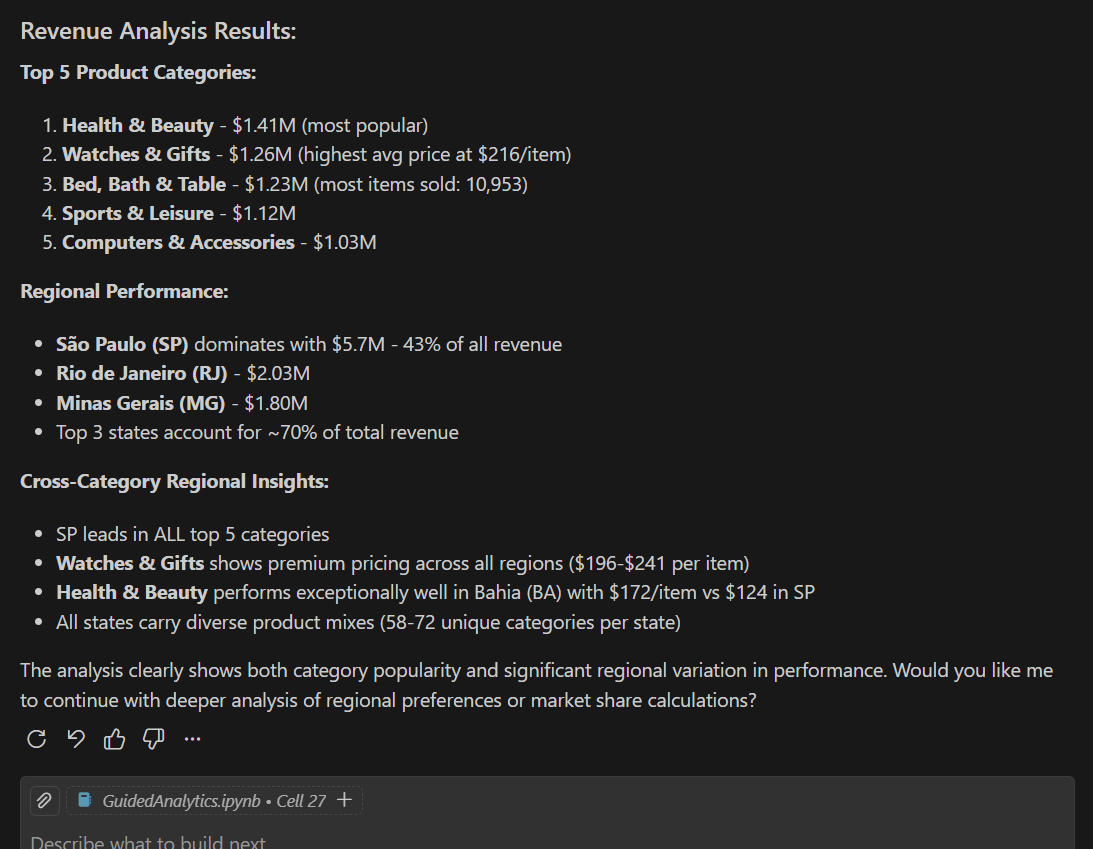

>Prompt:  
> Can we look at market share calculations?  

## Market Share Analysis

Let's calculate market share from multiple perspectives:

In [ ]:
# 1. Category Market Share - What percentage of total revenue does each category represent?
print("=== CATEGORY MARKET SHARE (ALL CATEGORIES) ===\n")

category_market_share = spark.sql("""
    WITH total_revenue AS (
        SELECT SUM(total_revenue) as overall_total
        FROM revenue_data
    )
    SELECT 
        category,
        ROUND(SUM(total_revenue), 2) as category_revenue,
        ROUND(SUM(total_revenue) * 100.0 / (SELECT overall_total FROM total_revenue), 2) as market_share_pct,
        COUNT(DISTINCT order_id) as total_orders,
        COUNT(*) as total_items
    FROM revenue_data
    GROUP BY category
    ORDER BY market_share_pct DESC
""")

category_market_share.show(20, truncate=False)

StatementMeta(, ef54e93c-ed03-476e-bc52-665d868231c3, 17, Finished, Available, Finished)

=== CATEGORY MARKET SHARE (ALL CATEGORIES) ===

+---------------------+----------------+----------------+------------+-----------+
|category             |category_revenue|market_share_pct|total_orders|total_items|
+---------------------+----------------+----------------+------------+-----------+
|health_beauty        |1412089.53      |9.28            |8647        |9465       |
|watches_gifts        |1264333.12      |8.31            |5495        |5859       |
|bed_bath_table       |1225209.26      |8.05            |9272        |10953      |
|sports_leisure       |1118256.91      |7.35            |7530        |8431       |
|computers_accessories|1032723.77      |6.78            |6530        |7644       |
|furniture_decor      |880329.92       |5.78            |6307        |8160       |
|housewares           |758392.25       |4.98            |5743        |6795       |
|cool_stuff           |691680.89       |4.54            |3559        |3718       |
|auto                 |669454.75       

In [18]:
# 2. Regional Market Share - What percentage of total revenue comes from each state?
print("=== REGIONAL MARKET SHARE (ALL STATES) ===\n")

state_market_share = spark.sql("""
    WITH total_revenue AS (
        SELECT SUM(total_revenue) as overall_total
        FROM revenue_data
    )
    SELECT 
        state,
        ROUND(SUM(total_revenue), 2) as state_revenue,
        ROUND(SUM(total_revenue) * 100.0 / (SELECT overall_total FROM total_revenue), 2) as market_share_pct,
        COUNT(DISTINCT order_id) as total_orders,
        COUNT(DISTINCT category) as unique_categories
    FROM revenue_data
    GROUP BY state
    ORDER BY market_share_pct DESC
""")

state_market_share.show(27, truncate=False)

StatementMeta(, ef54e93c-ed03-476e-bc52-665d868231c3, 18, Finished, Available, Finished)

=== REGIONAL MARKET SHARE (ALL STATES) ===

+-----+-------------+----------------+------------+-----------------+
|state|state_revenue|market_share_pct|total_orders|unique_categories|
+-----+-------------+----------------+------------+-----------------+
|SP   |5698549.55   |37.44           |39963       |72               |
|RJ   |2028970.26   |13.33           |12168       |70               |
|MG   |1797743.07   |11.81           |11190       |70               |
|RS   |851536.14    |5.59            |5270        |67               |
|PR   |772074.76    |5.07            |4855        |64               |
|SC   |587090.24    |3.86            |3491        |64               |
|BA   |583637.01    |3.83            |3215        |62               |
|DF   |343004.77    |2.25            |2050        |60               |
|GO   |324676.46    |2.13            |1911        |62               |
|ES   |315753.20    |2.07            |1978        |58               |
|PE   |304173.33    |2.00            |1576    

In [19]:
# 3. Category Market Share WITHIN Each State - Which categories dominate in each region?
print("=== CATEGORY MARKET SHARE WITHIN TOP 10 STATES ===\n")

category_share_by_state = spark.sql("""
    WITH state_totals AS (
        SELECT 
            state,
            SUM(total_revenue) as state_total_revenue
        FROM revenue_data
        GROUP BY state
        ORDER BY state_total_revenue DESC
        LIMIT 10
    )
    SELECT 
        r.state,
        r.category,
        ROUND(SUM(r.total_revenue), 2) as category_revenue_in_state,
        ROUND(SUM(r.total_revenue) * 100.0 / st.state_total_revenue, 2) as pct_of_state_revenue
    FROM revenue_data r
    INNER JOIN state_totals st ON r.state = st.state
    GROUP BY r.state, r.category, st.state_total_revenue
    ORDER BY r.state, pct_of_state_revenue DESC
""")

# Show top 5 categories per state
category_share_by_state.show(50, truncate=False)

StatementMeta(, ef54e93c-ed03-476e-bc52-665d868231c3, 19, Finished, Available, Finished)

=== CATEGORY MARKET SHARE WITHIN TOP 10 STATES ===

+-----+-------------------------------------+-------------------------+--------------------+
|state|category                             |category_revenue_in_state|pct_of_state_revenue|
+-----+-------------------------------------+-------------------------+--------------------+
|BA   |health_beauty                        |58620.07                 |10.04               |
|BA   |watches_gifts                        |50254.70                 |8.61                |
|BA   |sports_leisure                       |44410.84                 |7.61                |
|BA   |computers_accessories                |38502.91                 |6.60                |
|BA   |auto                                 |33532.84                 |5.75                |
|BA   |bed_bath_table                       |31245.40                 |5.35                |
|BA   |furniture_decor                      |30289.24                 |5.19                |
|BA   |garden_tool

In [20]:
# 4. State Market Share WITHIN Each Top Category - Where does each category sell best?
print("=== STATE MARKET SHARE WITHIN TOP 5 CATEGORIES ===\n")

state_share_by_category = spark.sql("""
    WITH top_categories AS (
        SELECT category
        FROM revenue_data
        GROUP BY category
        ORDER BY SUM(total_revenue) DESC
        LIMIT 5
    ),
    category_totals AS (
        SELECT 
            category,
            SUM(total_revenue) as category_total_revenue
        FROM revenue_data
        WHERE category IN (SELECT category FROM top_categories)
        GROUP BY category
    )
    SELECT 
        r.category,
        r.state,
        ROUND(SUM(r.total_revenue), 2) as state_revenue_in_category,
        ROUND(SUM(r.total_revenue) * 100.0 / ct.category_total_revenue, 2) as pct_of_category_revenue
    FROM revenue_data r
    INNER JOIN category_totals ct ON r.category = ct.category
    GROUP BY r.category, r.state, ct.category_total_revenue
    ORDER BY r.category, pct_of_category_revenue DESC
""")

state_share_by_category.show(50, truncate=False)

StatementMeta(, ef54e93c-ed03-476e-bc52-665d868231c3, 20, Finished, Available, Finished)

=== STATE MARKET SHARE WITHIN TOP 5 CATEGORIES ===

+---------------------+-----+-------------------------+-----------------------+
|category             |state|state_revenue_in_category|pct_of_category_revenue|
+---------------------+-----+-------------------------+-----------------------+
|bed_bath_table       |SP   |549061.89                |44.81                  |
|bed_bath_table       |RJ   |175647.96                |14.34                  |
|bed_bath_table       |MG   |156483.10                |12.77                  |
|bed_bath_table       |RS   |72428.18                 |5.91                   |
|bed_bath_table       |PR   |54851.87                 |4.48                   |
|bed_bath_table       |SC   |37362.68                 |3.05                   |
|bed_bath_table       |BA   |31245.40                 |2.55                   |
|bed_bath_table       |GO   |27089.39                 |2.21                   |
|bed_bath_table       |ES   |26949.26                 |2.20         

### Market Share Analysis Summary

**Category Market Share (National Level):**
- **Top 5 categories control 39.8% of total revenue**
  - Health & Beauty: 9.28%
  - Watches & Gifts: 8.31%
  - Bed, Bath & Table: 8.05%
  - Sports & Leisure: 7.35%
  - Computers & Accessories: 6.78%
- **Market is fragmented** - No single category dominates (largest is <10%)
- **Top 20 categories account for ~74% of revenue** - long tail of smaller categories

**Regional Market Share (National Level):**
- **Extreme geographic concentration**:
  - São Paulo (SP): **37.44%** of all revenue
  - Top 3 states (SP, RJ, MG): **62.58%** of all revenue
  - Top 10 states: **89.67%** of all revenue
- **Underdeveloped regions**: Bottom 5 states combined = only 0.85% of revenue
- **Opportunity**: 17 states each represent <2% of market share individually

**Category Performance Within States:**
The category mix within each state shows:
- **Consistency across regions** - Top categories nationally (Health & Beauty, Watches, Bed/Bath) also lead in most states
- **Local variations exist** - Different states show different category preferences within their markets

**State Performance Within Categories:**
Geographic concentration varies by category:
- **Bed, Bath & Table**: SP = 44.81%, Top 3 states = 71.92%
- **Computers & Accessories**: SP = 37.40%, Top 3 states = 62.95%
- Even premium categories show strong SP dominance

**Key Business Insights:**
1. **No category monopoly** - Diversified portfolio reduces risk
2. **SP market critical** - Over 1/3 of all revenue from one state
3. **Regional expansion opportunity** - 17 states each <2% market share
4. **Category consistency** - Same categories perform well across regions (scalable marketing)

## This is from the ghcp chat:  

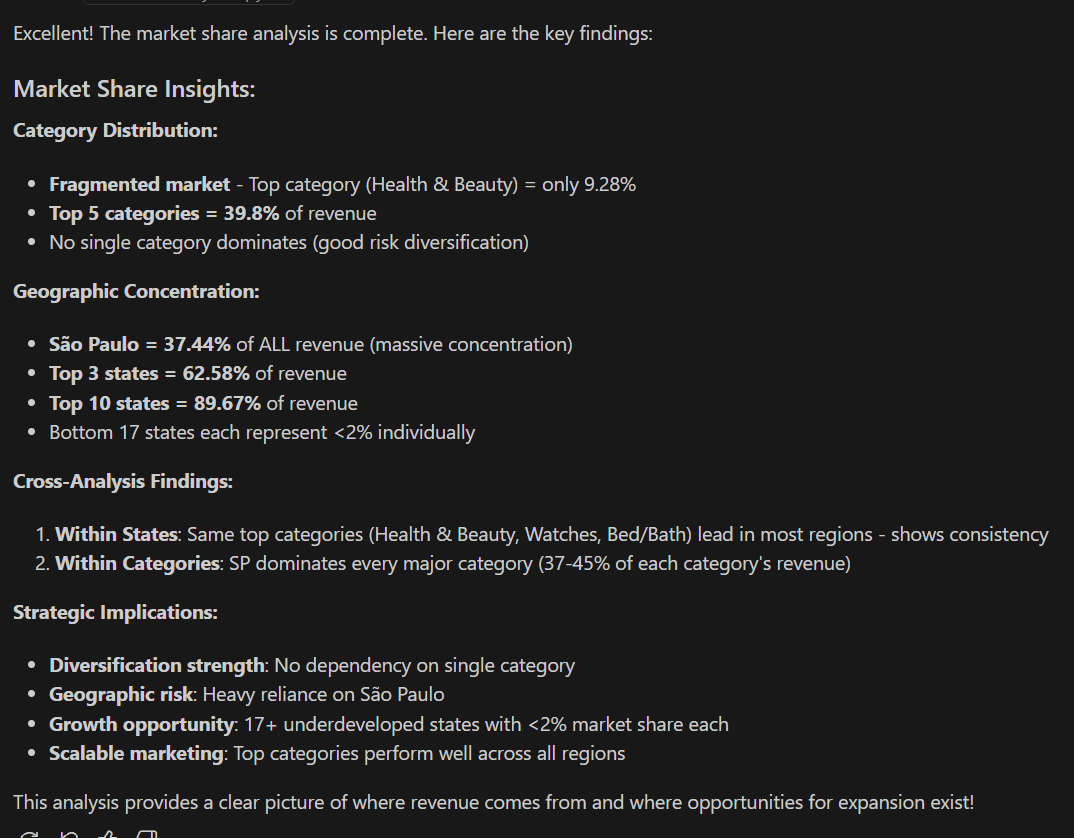

# Summary Findings

* I'm not going to belabor this demo.  Clearly we could continue asking questions and finding nuggets of gold in the data.  
* I did not add visualizations (because I didn't ask for any), but we could've.  
* **Note that the Claude Sonnet 4.5 model did not hallucinate or give ANY invalid code.**

Akshully, let's try out the visualizations.

>Prompt:  Can you recommend and create any visualizations for this data?  

## Data Visualizations

I recommend the following visualizations to tell the story of this data:

1. **Top 10 Categories by Revenue** - Bar chart showing revenue leaders
2. **Category Market Share** - Pie chart showing revenue distribution
3. **Regional Revenue Distribution** - Geographic heat map or bar chart
4. **Category Performance Across Top States** - Grouped bar chart
5. **Revenue Trends Over Time** - Line chart showing growth patterns

In [21]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

StatementMeta(, ef54e93c-ed03-476e-bc52-665d868231c3, 21, Finished, Available, Finished)

StatementMeta(, ef54e93c-ed03-476e-bc52-665d868231c3, 22, Finished, Available, Finished)

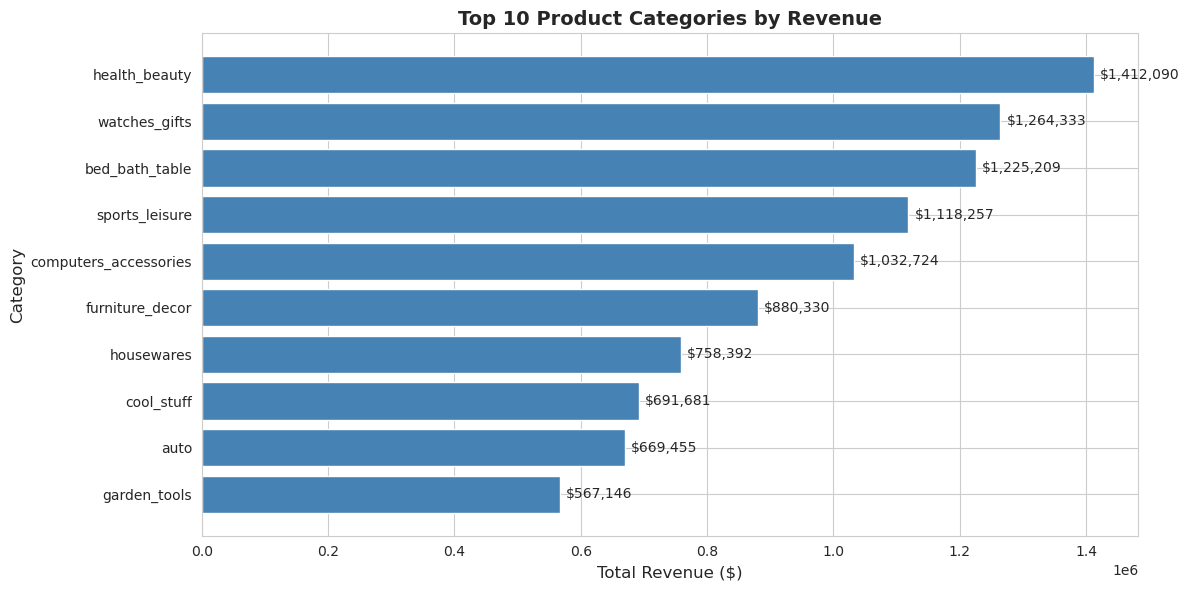

In [ ]:
# Visualization 1: Top 10 Categories by Revenue - Horizontal Bar Chart
top_10_cat = spark.sql("""
    SELECT 
        category,
        ROUND(SUM(total_revenue), 2) as total_revenue
    FROM revenue_data
    GROUP BY category
    ORDER BY total_revenue DESC
    LIMIT 10
""").toPandas()

plt.figure(figsize=(12, 6))
plt.barh(top_10_cat['category'], top_10_cat['total_revenue'], color='steelblue')
plt.xlabel('Total Revenue ($)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.title('Top 10 Product Categories by Revenue', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Highest at top

# Add value labels
for i, v in enumerate(top_10_cat['total_revenue']):
    plt.text(v + 10000, i, f'${v:,.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

StatementMeta(, ef54e93c-ed03-476e-bc52-665d868231c3, 23, Finished, Available, Finished)

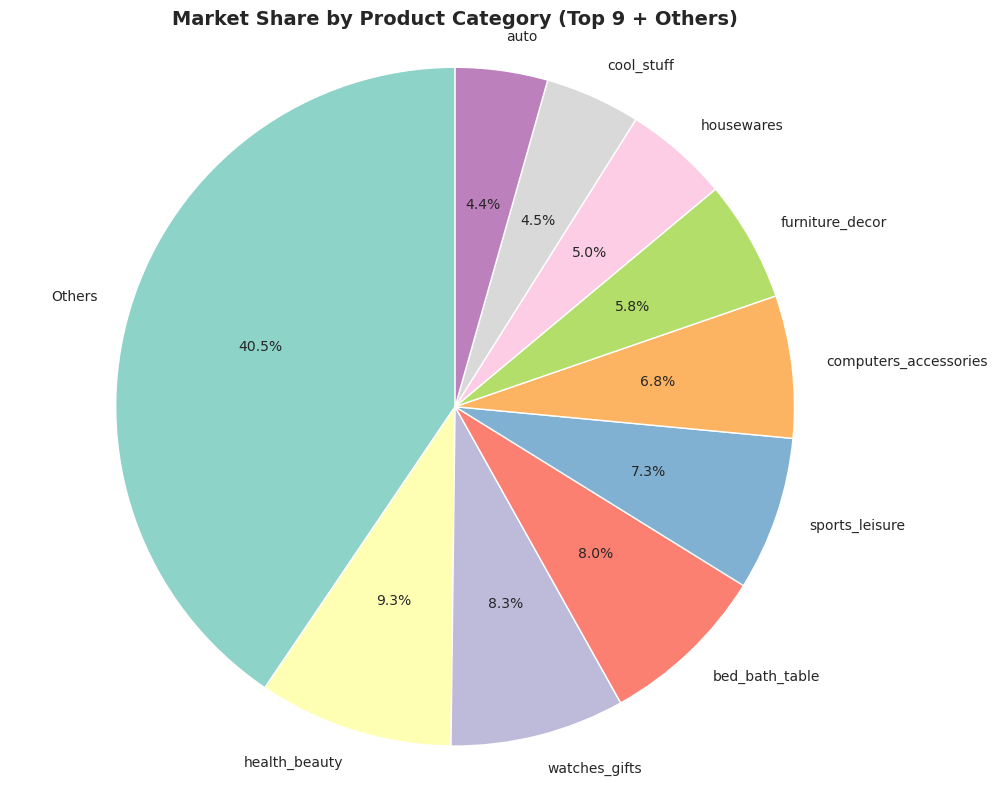

In [23]:
# Visualization 2: Category Market Share - Pie Chart (Top 10 + Others)
market_share_data = spark.sql("""
    WITH total_rev AS (
        SELECT SUM(total_revenue) as overall_total
        FROM revenue_data
    ),
    top_9_categories AS (
        SELECT 
            category,
            ROUND(SUM(total_revenue), 2) as revenue
        FROM revenue_data
        GROUP BY category
        ORDER BY revenue DESC
        LIMIT 9
    ),
    others AS (
        SELECT 
            'Others' as category,
            ROUND(SUM(total_revenue), 2) as revenue
        FROM revenue_data
        WHERE category NOT IN (SELECT category FROM top_9_categories)
    )
    SELECT * FROM top_9_categories
    UNION ALL
    SELECT * FROM others
    ORDER BY revenue DESC
""").toPandas()

plt.figure(figsize=(10, 8))
colors = plt.cm.Set3(range(len(market_share_data)))
plt.pie(market_share_data['revenue'], labels=market_share_data['category'], autopct='%1.1f%%',
        colors=colors, startangle=90, textprops={'fontsize': 10})
plt.title('Market Share by Product Category (Top 9 + Others)', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

StatementMeta(, ef54e93c-ed03-476e-bc52-665d868231c3, 24, Finished, Available, Finished)

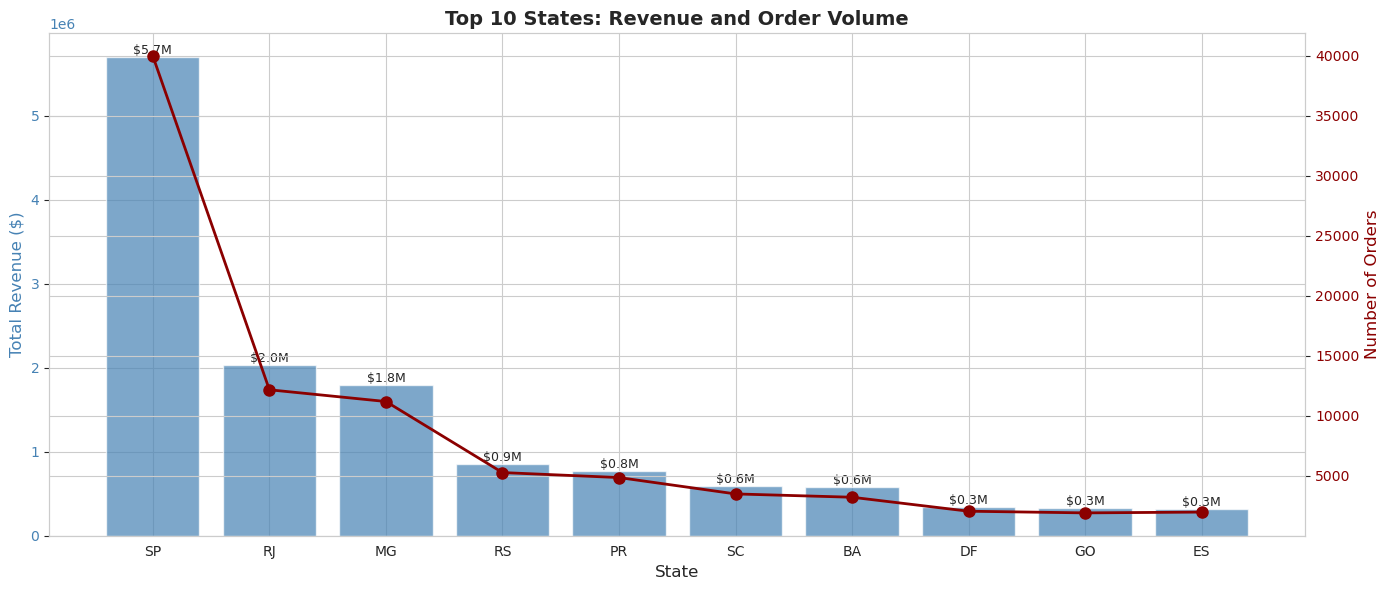

In [24]:
# Visualization 3: Top 10 States by Revenue - Bar Chart
top_10_states = spark.sql("""
    SELECT 
        state,
        ROUND(SUM(total_revenue), 2) as total_revenue,
        COUNT(DISTINCT order_id) as order_count
    FROM revenue_data
    GROUP BY state
    ORDER BY total_revenue DESC
    LIMIT 10
""").toPandas()

fig, ax1 = plt.subplots(figsize=(14, 6))

# Revenue bars
color = 'steelblue'
ax1.set_xlabel('State', fontsize=12)
ax1.set_ylabel('Total Revenue ($)', color=color, fontsize=12)
bars = ax1.bar(top_10_states['state'], top_10_states['total_revenue'], color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

# Add revenue labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'${height/1000000:.1f}M',
             ha='center', va='bottom', fontsize=9)

# Order count line
ax2 = ax1.twinx()
color = 'darkred'
ax2.set_ylabel('Number of Orders', color=color, fontsize=12)
ax2.plot(top_10_states['state'], top_10_states['order_count'], color=color, marker='o', linewidth=2, markersize=8)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Top 10 States: Revenue and Order Volume', fontsize=14, fontweight='bold')
fig.tight_layout()
plt.show()

StatementMeta(, ef54e93c-ed03-476e-bc52-665d868231c3, 27, Finished, Available, Finished)

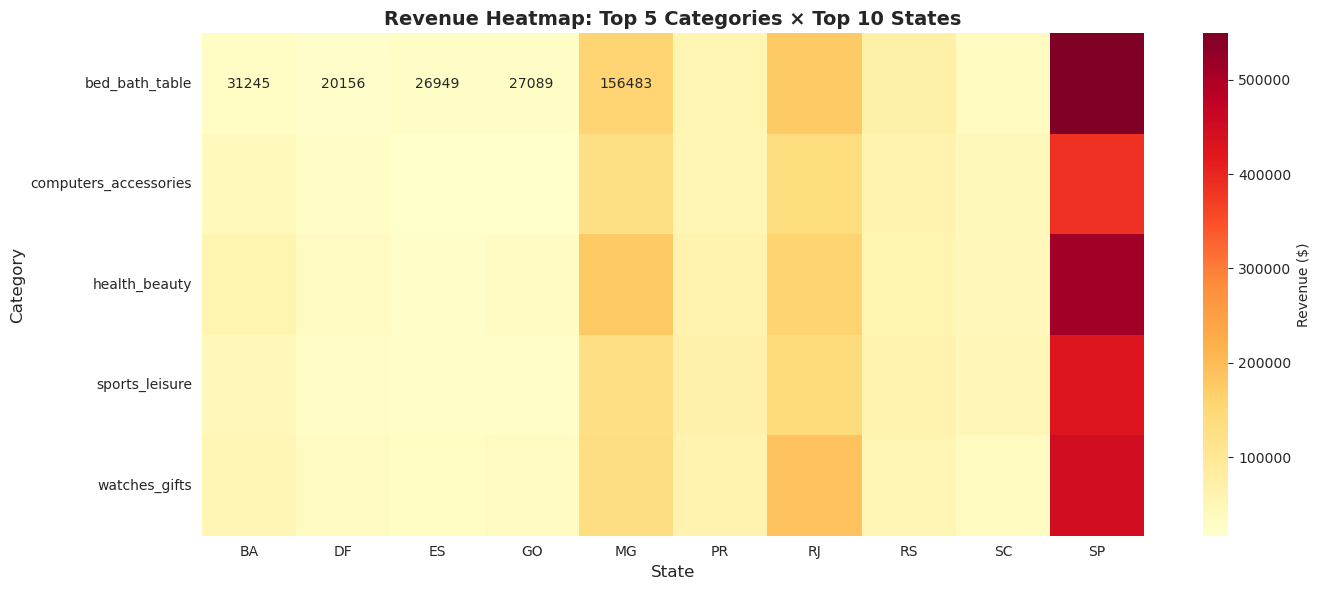

In [27]:
# Visualization 4: Heatmap - Top 5 Categories × Top 10 States
heatmap_data = spark.sql("""
    WITH top_5_categories AS (
        SELECT category
        FROM revenue_data
        GROUP BY category
        ORDER BY SUM(total_revenue) DESC
        LIMIT 5
    ),
    top_10_states AS (
        SELECT state
        FROM revenue_data
        GROUP BY state
        ORDER BY SUM(total_revenue) DESC
        LIMIT 10
    )
    SELECT 
        r.state,
        r.category,
        ROUND(SUM(r.total_revenue), 2) as revenue
    FROM revenue_data r
    INNER JOIN top_5_categories tc ON r.category = tc.category
    INNER JOIN top_10_states ts ON r.state = ts.state
    GROUP BY r.state, r.category
""").toPandas()

# Pivot for heatmap
heatmap_pivot = heatmap_data.pivot(index='category', columns='state', values='revenue')
heatmap_pivot = heatmap_pivot.astype(float)  # Ensure numeric type

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_pivot, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Revenue ($)'})
plt.title('Revenue Heatmap: Top 5 Categories × Top 10 States', fontsize=14, fontweight='bold')
plt.xlabel('State', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.tight_layout()
plt.show()

StatementMeta(, ef54e93c-ed03-476e-bc52-665d868231c3, 28, Finished, Available, Finished)

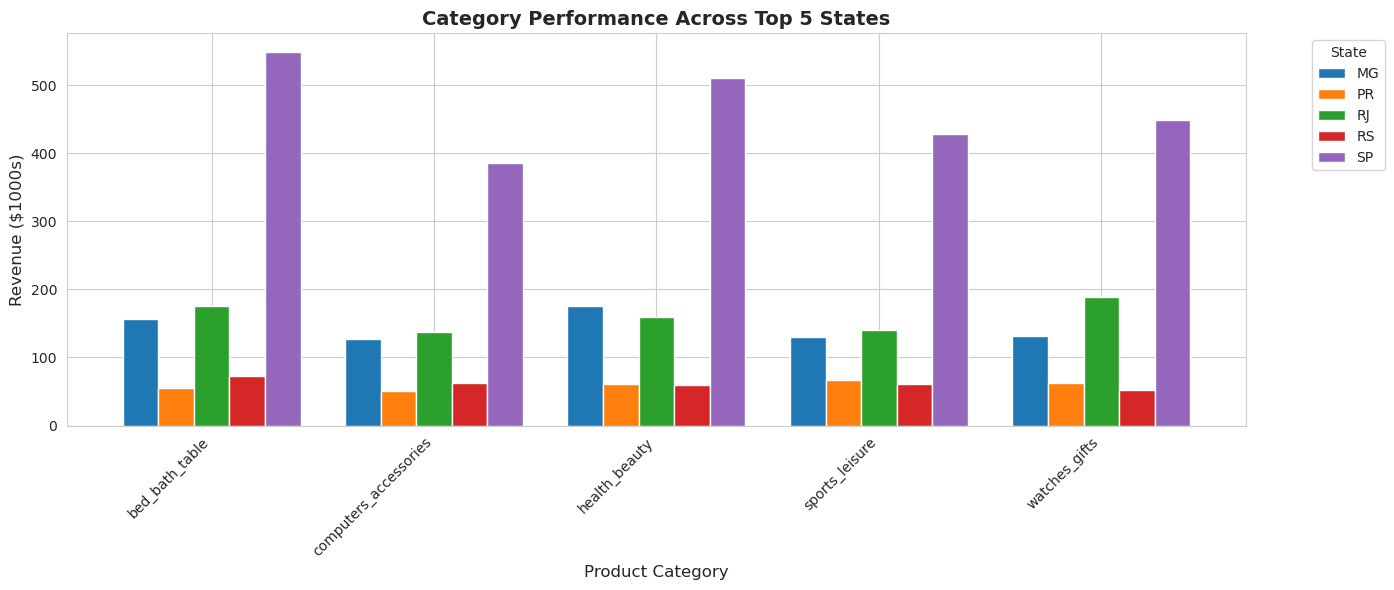

In [28]:
# Visualization 5: Grouped Bar Chart - Top 5 Categories across Top 5 States
grouped_data = spark.sql("""
    WITH top_5_categories AS (
        SELECT category
        FROM revenue_data
        GROUP BY category
        ORDER BY SUM(total_revenue) DESC
        LIMIT 5
    ),
    top_5_states AS (
        SELECT state
        FROM revenue_data
        GROUP BY state
        ORDER BY SUM(total_revenue) DESC
        LIMIT 5
    )
    SELECT 
        r.category,
        r.state,
        ROUND(SUM(r.total_revenue)/1000, 2) as revenue_k
    FROM revenue_data r
    INNER JOIN top_5_categories tc ON r.category = tc.category
    INNER JOIN top_5_states ts ON r.state = ts.state
    GROUP BY r.category, r.state
    ORDER BY r.category, revenue_k DESC
""").toPandas()

# Create grouped bar chart
pivot_data = grouped_data.pivot(index='category', columns='state', values='revenue_k')
pivot_data = pivot_data.astype(float)  # Ensure numeric type

ax = pivot_data.plot(kind='bar', figsize=(14, 6), width=0.8)
plt.title('Category Performance Across Top 5 States', fontsize=14, fontweight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Revenue ($1000s)', fontsize=12)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

StatementMeta(, ef54e93c-ed03-476e-bc52-665d868231c3, 29, Finished, Available, Finished)

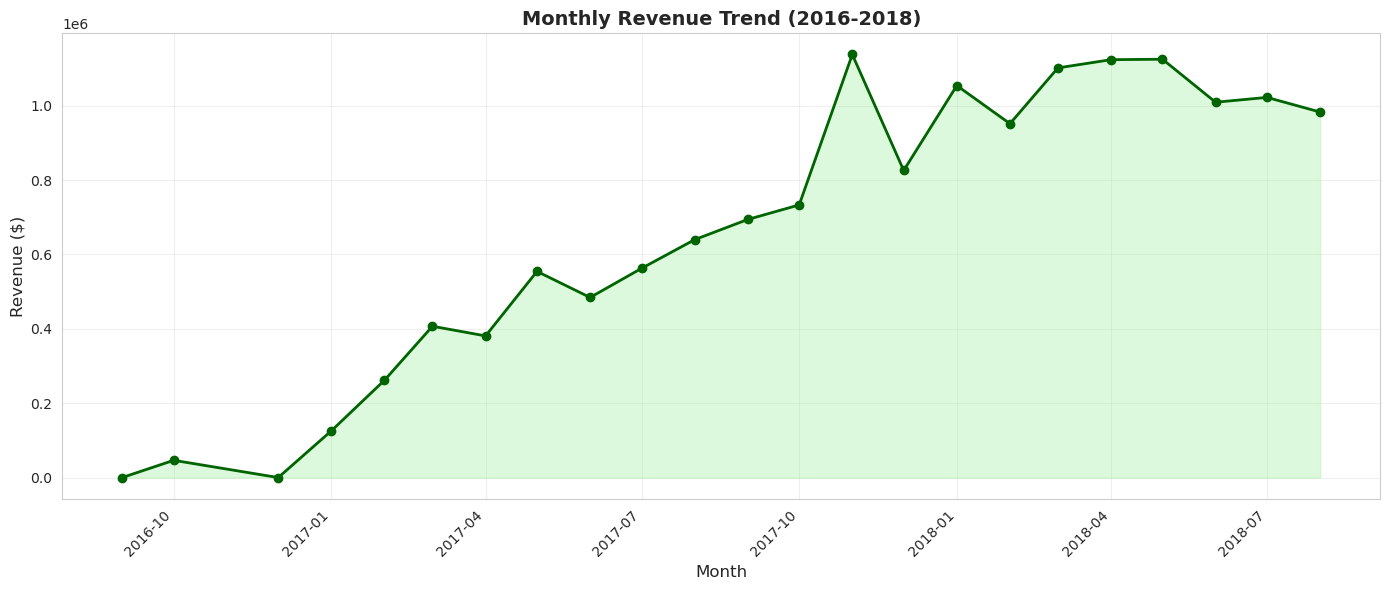

In [29]:
# Visualization 6: Revenue Trends Over Time - Line Chart
monthly_revenue = spark.sql("""
    SELECT 
        DATE_TRUNC('MONTH', CAST(o.order_purchase_timestamp AS TIMESTAMP)) as month,
        ROUND(SUM(CAST(oi.price AS DECIMAL(10,2)) + CAST(oi.freight_value AS DECIMAL(10,2))), 2) as revenue
    FROM olist_order_items_dataset oi
    INNER JOIN olist_orders_dataset o ON oi.order_id = o.order_id
    INNER JOIN olist_products_dataset p ON oi.product_id = p.product_id
    WHERE o.order_status = 'delivered'
        AND p.product_category_name IS NOT NULL
        AND o.order_purchase_timestamp IS NOT NULL
    GROUP BY DATE_TRUNC('MONTH', CAST(o.order_purchase_timestamp AS TIMESTAMP))
    ORDER BY month
""").toPandas()

plt.figure(figsize=(14, 6))
plt.plot(monthly_revenue['month'], monthly_revenue['revenue'], marker='o', linewidth=2, markersize=6, color='darkgreen')
plt.fill_between(monthly_revenue['month'], monthly_revenue['revenue'], alpha=0.3, color='lightgreen')
plt.title('Monthly Revenue Trend (2016-2018)', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

StatementMeta(, ef54e93c-ed03-476e-bc52-665d868231c3, 30, Finished, Available, Finished)

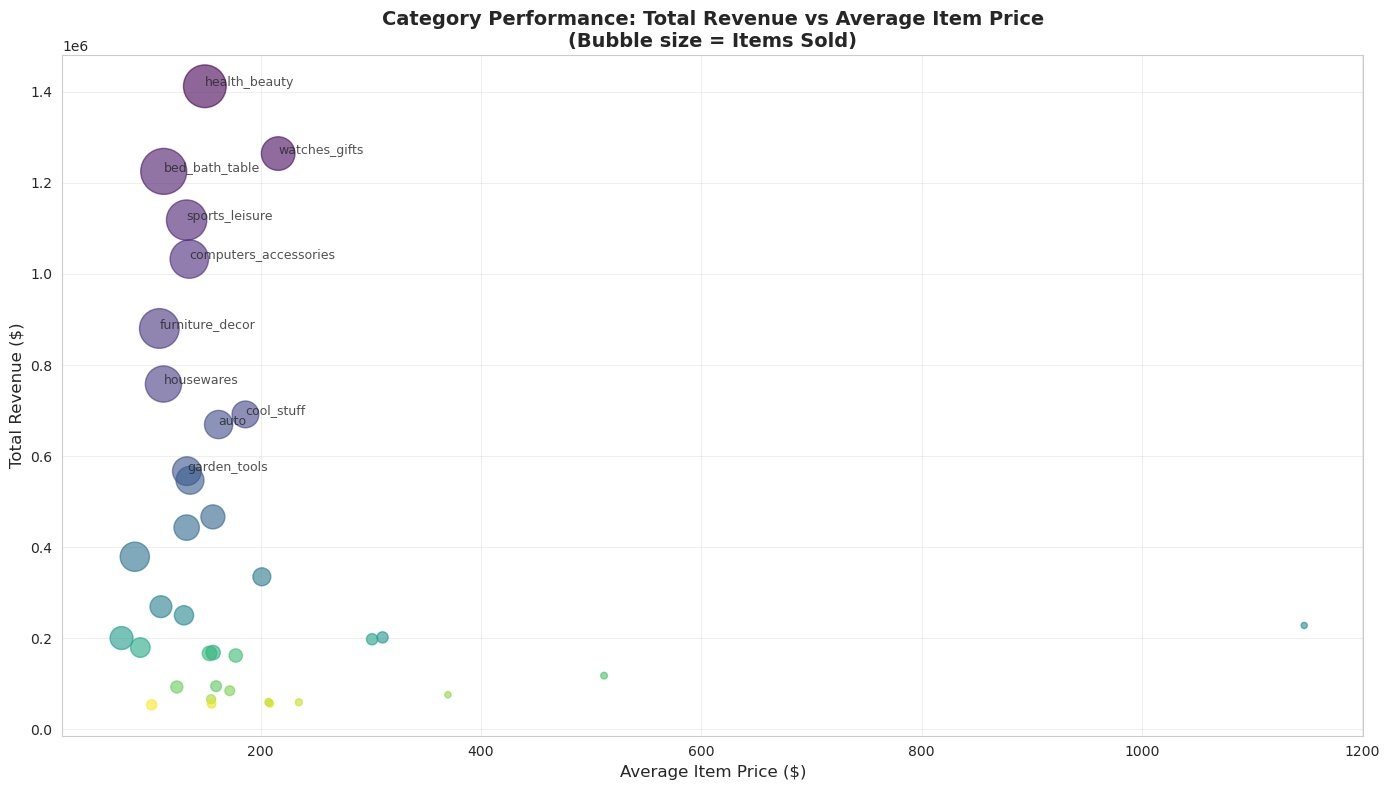

In [30]:
# Visualization 7: Top Categories - Revenue vs Average Item Price (Scatter Plot)
category_metrics = spark.sql("""
    SELECT 
        category,
        ROUND(SUM(total_revenue), 2) as total_revenue,
        ROUND(AVG(total_revenue), 2) as avg_item_price,
        COUNT(*) as items_sold
    FROM revenue_data
    GROUP BY category
    HAVING SUM(total_revenue) > 50000
    ORDER BY total_revenue DESC
""").toPandas()

plt.figure(figsize=(14, 8))
scatter = plt.scatter(category_metrics['avg_item_price'], 
                     category_metrics['total_revenue'],
                     s=category_metrics['items_sold']/10,  # Size by items sold
                     alpha=0.6,
                     c=range(len(category_metrics)),
                     cmap='viridis')

# Add labels for top categories
for i in range(min(10, len(category_metrics))):
    plt.annotate(category_metrics.iloc[i]['category'], 
                (category_metrics.iloc[i]['avg_item_price'], 
                 category_metrics.iloc[i]['total_revenue']),
                fontsize=9, alpha=0.8)

plt.xlabel('Average Item Price ($)', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.title('Category Performance: Total Revenue vs Average Item Price\n(Bubble size = Items Sold)', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Visualization Insights

**Chart 1: Top 10 Categories (Bar Chart)**
- Clear visual hierarchy showing Health & Beauty leading at $1.4M
- Demonstrates relatively balanced competition among top categories

**Chart 2: Market Share (Pie Chart)**
- Shows fragmentation: "Others" represents 40.5% of market
- No single category dominates - healthy diversification

**Chart 3: State Performance (Dual-Axis Chart)**
- SP's overwhelming dominance is visually striking ($5.7M)
- Sharp drop-off after top 3 states (SP, RJ, MG)
- Revenue and order volume are highly correlated (red line follows bars)

**Chart 4: Revenue Heatmap**
- SP column is consistently darkest (highest revenue across all categories)
- Visual confirmation that São Paulo dominates every major category
- Color intensity shows revenue concentration patterns

**Chart 5: Grouped Bar Chart**
- SP (purple bars) towers over other states in every category
- Consistent pattern: SP > RJ > MG across all top 5 categories
- Shows that category performance hierarchy is similar across regions

**Chart 6: Monthly Trend Line**
- Strong growth from late 2016 through late 2017
- Revenue plateau around $1M/month in 2018
- Potential seasonality spike visible (November 2017 peak - holiday season?)

**Chart 7: Scatter Plot (Revenue vs Price)**
- Health & Beauty achieves highest revenue despite moderate pricing (~$150/item)
- Watches & Gifts show higher price point (~$215) strategy
- Bubble size reveals volume story: more items sold ≠ always higher revenue
- Some small categories charge premium prices but lack volume